In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Housing prices data with few columns for convinience
import pandas as pd
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/housing_trim.csv")
len(dataset)

1460

In [0]:
dataset.head()

,MSZoning,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,SalePrice
0,RL,65.0,8450,2Story,7,5,2003,208500
1,RL,80.0,9600,1Story,6,8,1976,181500
2,RL,68.0,11250,2Story,7,5,2001,223500
3,RL,60.0,9550,2Story,7,5,1915,140000
4,RL,84.0,14260,2Story,8,5,2000,250000


In [0]:
#To set display options to maximum
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [0]:
#datatypes of dataset
dataset.dtypes

MSZoning        object
LotFrontage    float64
LotArea          int64
HouseStyle      object
OverallQual      int64
OverallCond      int64
YearBuilt        int64
SalePrice        int64
dtype: object

In [0]:
# Missing values %
print("Column-wise missing value percentage")
print(dataset.isnull().sum()/len(dataset)*100)

Column-wise missing value percentage
MSZoning       0.000000 
LotFrontage    17.739726
LotArea        0.000000 
HouseStyle     0.000000 
OverallQual    0.000000 
OverallCond    0.000000 
YearBuilt      0.000000 
SalePrice      0.000000 
dtype: float64


In [0]:
TargetVar = ['SalePrice']
CategoricalFeatures = ['MSZoning','HouseStyle']
ContinuousVar = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt']

###Delete columns with high percentage of missing values

In [0]:
a = dataset.isnull().sum()/len(dataset)*100
#Very little data (Can change the number)
del_cols = a[a>70.0].index

In [0]:
edit = dataset.drop(dataset.loc[:,del_cols].head(0).columns, axis=1)

##EDA

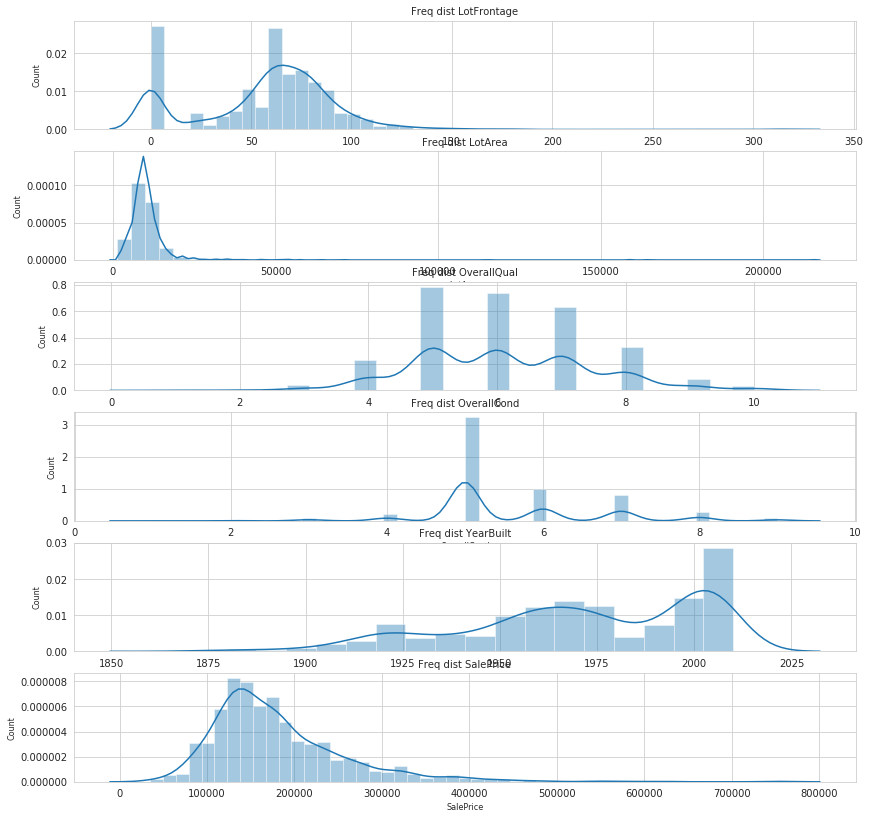

In [0]:
col_names = ContinuousVar
col_names.extend(TargetVar)
fig, ax = plt.subplots(len(col_names), figsize=(14,14))

for i, col_val in enumerate(col_names):

    sns.distplot(edit[col_val].fillna(0), hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [0]:
!pip install researchpy

In [0]:
import scipy.stats as stats
import researchpy as rp

rp.summary_cont(edit[ContinuousVar])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,LotFrontage,1201.0,70.049958,24.284752,0.700748,68.675130,71.424787
1,LotArea,1460.0,10516.828082,9981.264932,261.221642,10004.417990,11029.238175
2,OverallQual,1460.0,6.099315,1.382997,0.036195,6.028316,6.170314
3,OverallCond,1460.0,5.575342,1.112799,0.029123,5.518214,5.632470
4,YearBuilt,1460.0,1971.267808,30.202904,0.790446,1969.717276,1972.818340
5,SalePrice,1460.0,180921.195890,79442.502883,2079.105324,176842.841041,184999.550740


In [0]:
for i, col_val in enumerate(CategoricalFeatures):
  print(rp.summary_cont(edit[TargetVar].groupby(edit[col_val])))



         SalePrice                                                            \
                 N           Mean            SD            SE      95% Conf.   
MSZoning                                                                       
C (all)   10        74528.000000   33791.092031  10685.681544  53584.064173    
FV        65        214014.061538  52369.662067  6495.657135   201282.573554   
RH        16        131558.375000  35714.118435  8928.529609   114058.456967   
RL        1151      191004.994787  80766.341319  2380.634637   186338.950898   
RM        218       126316.830275  48521.689833  3286.303509   119875.675398   

                         
               Interval  
MSZoning                 
C (all)   95471.935827   
FV        226745.549523  
RH        149058.293033  
RL        195671.038677  
RM        132757.985153  


           SalePrice                                              \
                   N           Mean             SD            SE   
HouseStyle 

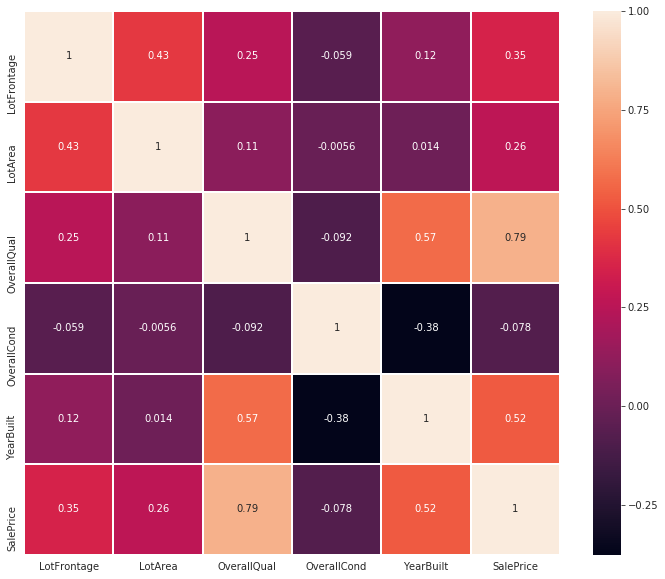

In [0]:
#Correlation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
df = edit.drop(CategoricalFeatures, axis=1)
sns.heatmap(df.corr(), annot=True, linewidths=1, linecolor='white')

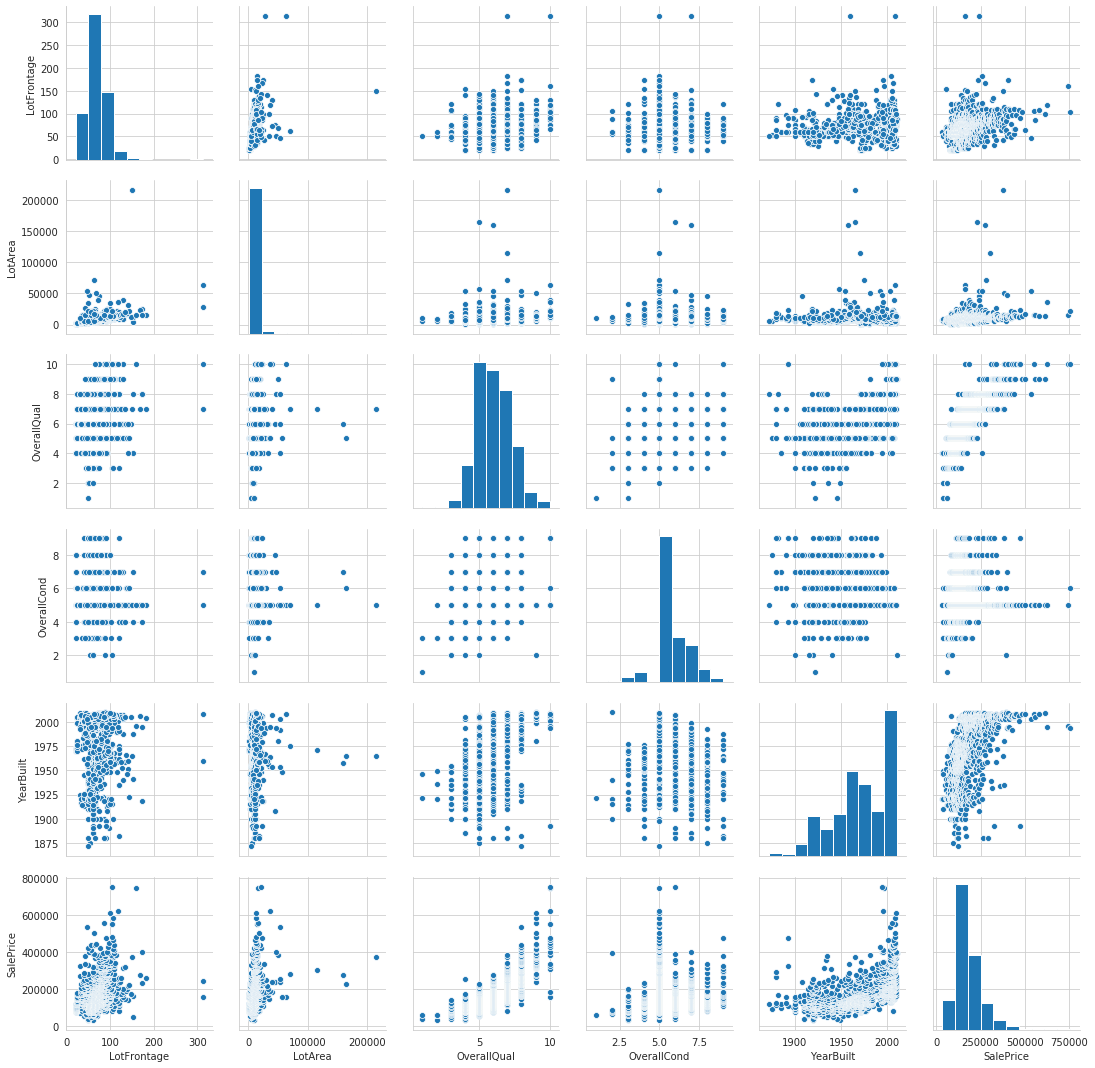

In [0]:
edit_1 = edit.drop(CategoricalFeatures, axis=1)
sns.pairplot(edit_1)

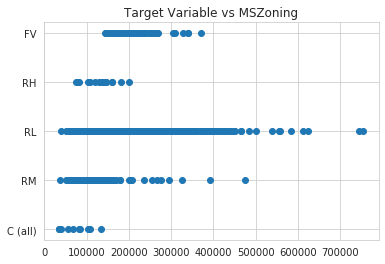

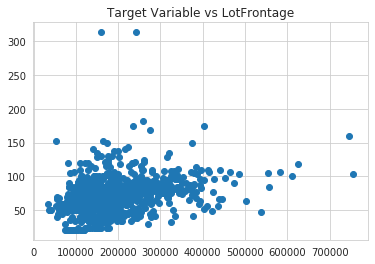

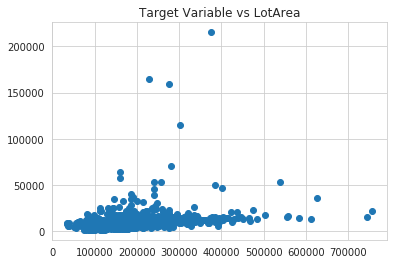

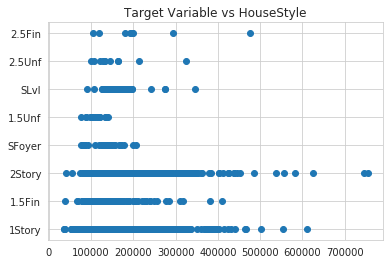

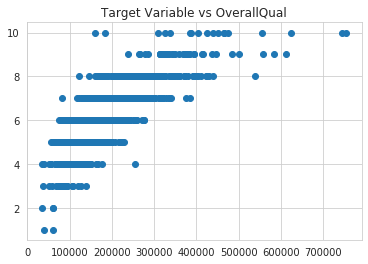

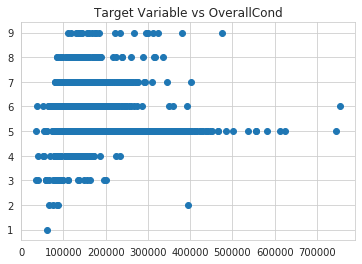

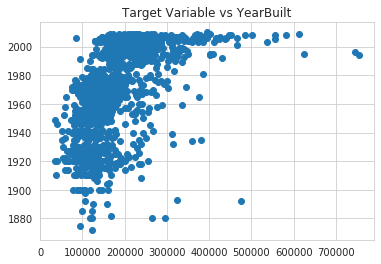

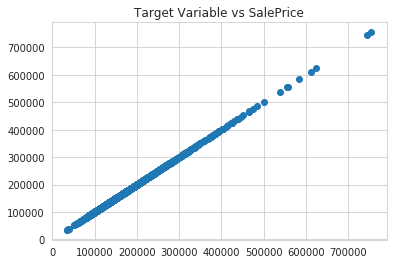

In [0]:
#Scatterplot to get and idea of relationships
#Replace SalePrice with the dependant variable
edit = edit.sort_values(TargetVar)
for i in edit.columns:
    plt.scatter(edit[TargetVar], edit[i])
    plt.title('Target Variable vs '+i)
    plt.show()
    plt.close()

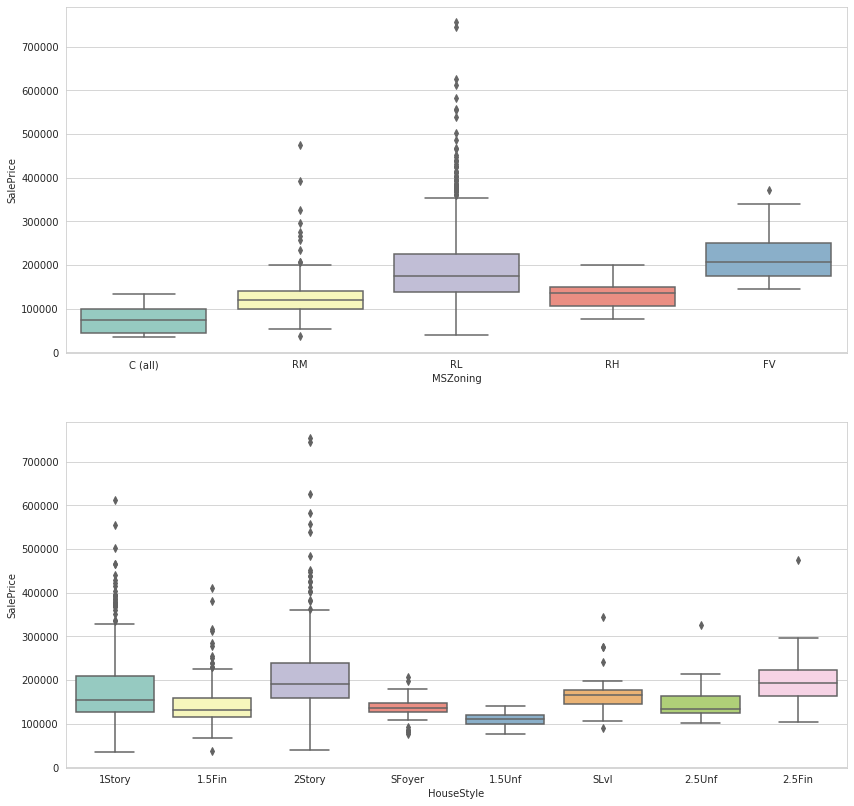

In [0]:
#Side by Side boxplot to understand relationship of categorical variables with dependant variable
import seaborn as sns
sns.set_style("whitegrid")
fig, ax = plt.subplots(len(CategoricalFeatures), figsize=(14,14))

for i,col_val in enumerate(CategoricalFeatures):
  sns.boxplot(x=edit[col_val], y=edit[TargetVar[0]], data=edit, palette="Set3",ax=ax[i])
plt.show()


In [0]:
#Train test
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

X = dataset.drop(['SalePrice'],axis=1)
Y = dataset['SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20, random_state=11)